In [1]:
import hybrid

In [2]:
import pandas as pd
import numpy as np

hybrid2=pd.read_csv('hybrid2.csv')
hybrid1=pd.read_csv('hybrid1.csv')
real_data=pd.read_csv('german_credit_data.csv')
synthpop=pd.read_csv('synthpop_german.csv')

In [3]:
from sdv.metadata import SingleTableMetadata #this is a function that creates metadata, tries to capture the datatypes 
                                              
metadata = SingleTableMetadata()#creating an empty data table
metadata.detect_from_csv(filepath='german_credit_data.csv')

In [4]:
new_data2= new_data2.drop(new_data2.columns[[0]],axis=1)
new_data2
synthetic_dataCTGAN=synthetic_dataCTGAN.drop(synthetic_dataCTGAN.columns[[0]],axis=1)

In [5]:
new_data2

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,0<=X<200,10,critical/other existing credit,education,1789,<100,4<=X<7,4,male div/sep,none,...,car,42,bank,own,1,high qualif/self emp/mgmt,1,none,no,bad
1,0<=X<200,12,existing paid,used car,1739,>=1000,<1,1,female div/dep/mar,none,...,real estate,30,none,own,1,unskilled resident,2,none,yes,good
2,>=200,11,critical/other existing credit,furniture/equipment,568,<100,unemployed,3,female div/dep/mar,none,...,real estate,30,none,own,2,skilled,1,yes,yes,bad
3,<0,8,existing paid,furniture/equipment,1230,500<=X<1000,unemployed,4,male div/sep,guarantor,...,car,55,none,for free,1,high qualif/self emp/mgmt,1,none,no,bad
4,0<=X<200,8,critical/other existing credit,furniture/equipment,2817,no known savings,4<=X<7,1,female div/dep/mar,none,...,car,42,none,own,2,skilled,1,yes,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0<=X<200,21,critical/other existing credit,furniture/equipment,1388,<100,unemployed,4,male single,none,...,no known property,49,none,own,2,skilled,1,yes,yes,good
29996,<0,13,delayed previously,business,1863,no known savings,1<=X<4,4,male single,none,...,car,32,none,own,2,skilled,2,yes,yes,bad
29997,<0,6,existing paid,radio/tv,1828,no known savings,4<=X<7,1,male single,none,...,real estate,31,bank,own,1,skilled,1,none,yes,good
29998,<0,7,delayed previously,new car,3604,500<=X<1000,>=7,1,male single,none,...,no known property,24,none,for free,1,skilled,2,none,yes,good


In [6]:
from sdv.single_table import CTGANSynthesizer

synthesizerCTGAN = CTGANSynthesizer.load(
    'my_CTGAN_synthesizer.pkl'
)

TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [7]:
result = hybrid.hybrid(real_data, new_data2,synthetic_dataCTGAN , metadata)

First dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]



Overall Quality Score: 85.47%

Properties:
Column Shapes: 89.03%
Column Pair Trends: 81.9%
Second dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.02it/s]



Overall Quality Score: 87.74%

Properties:
Column Shapes: 89.88%
Column Pair Trends: 85.59%
--------------First dataset report:-------------
                    Column        Metric  Quality Score
0                 duration  KSComplement       0.900233
1            credit_amount  KSComplement       0.939000
2   installment_commitment  KSComplement       0.951000
3          residence_since  KSComplement       0.927133
4                      age  KSComplement       0.977800
5         existing_credits  KSComplement       0.883900
6           num_dependents  KSComplement       0.934433
7          checking_status  TVComplement       0.859067
8           credit_history  TVComplement       0.812833
9                  purpose  TVComplement       0.803333
10          savings_status  TVComplement       0.646467
11              employment  TVComplement       0.823167
12         personal_status  TVComplement       0.914600
13           other_parties  TVComplement       0.883467
14      property_m

Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.09it/s]



Overall Quality Score: 91.59%

Properties:
Column Shapes: 93.99%
Column Pair Trends: 89.18%
Hybrid dataset report:
                    Column        Metric  Quality Score
0                 duration  KSComplement       0.900233
1            credit_amount  KSComplement       0.939000
2   installment_commitment  KSComplement       0.951000
3          residence_since  KSComplement       0.927200
4                      age  KSComplement       0.977800
5         existing_credits  KSComplement       0.883900
6           num_dependents  KSComplement       0.934433
7          checking_status  TVComplement       0.874200
8           credit_history  TVComplement       0.946100
9                  purpose  TVComplement       0.902133
10          savings_status  TVComplement       0.968933
11              employment  TVComplement       0.936400
12         personal_status  TVComplement       0.937733
13           other_parties  TVComplement       0.939400
14      property_magnitude  TVComplement    

In [8]:
result.to_csv('hybrid1.csv')

In [9]:
synthpop

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no checking,15,critical/other existing credit,furniture/equipment,1366,<100,>=7,2,male single,none,...,life insurance,65,none,own,2,unskilled resident,1,yes,yes,good
1,<0,9,critical/other existing credit,other,2214,<100,4<=X<7,2,male single,none,...,real estate,52,none,own,2,skilled,1,yes,yes,good
2,no checking,47,no credits/all paid,repairs,10722,<100,>=7,2,female div/dep/mar,none,...,life insurance,38,none,for free,1,skilled,2,none,yes,bad
3,<0,9,existing paid,new car,385,<100,>=7,4,male single,none,...,life insurance,51,none,own,2,skilled,1,yes,yes,good
4,>=200,24,existing paid,used car,1659,<100,1<=X<4,4,male single,none,...,life insurance,63,none,own,3,unskilled resident,1,yes,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0<=X<200,15,critical/other existing credit,furniture/equipment,674,500<=X<1000,>=7,4,male single,none,...,life insurance,52,none,own,3,skilled,1,yes,yes,good
29996,no checking,6,critical/other existing credit,furniture/equipment,1957,no known savings,1<=X<4,2,male single,none,...,life insurance,47,none,own,1,skilled,2,none,yes,good
29997,0<=X<200,6,existing paid,new car,2647,<100,4<=X<7,2,male single,none,...,real estate,28,none,rent,2,unskilled resident,2,yes,yes,good
29998,no checking,24,existing paid,radio/tv,3357,<100,<1,3,male single,none,...,life insurance,20,none,rent,2,skilled,1,yes,yes,good


In [10]:
result2 = hybrid.hybrid(real_data, result,synthpop , metadata)

First dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.15it/s]



Overall Quality Score: 91.59%

Properties:
Column Shapes: 93.99%
Column Pair Trends: 89.18%
Second dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.13it/s]



Overall Quality Score: 77.19%

Properties:
Column Shapes: 81.04%
Column Pair Trends: 73.34%
--------------First dataset report:-------------
                    Column        Metric  Quality Score
0                 duration  KSComplement       0.900233
1            credit_amount  KSComplement       0.939000
2   installment_commitment  KSComplement       0.951000
3          residence_since  KSComplement       0.927200
4                      age  KSComplement       0.977800
5         existing_credits  KSComplement       0.883900
6           num_dependents  KSComplement       0.934433
7          checking_status  TVComplement       0.874200
8           credit_history  TVComplement       0.946100
9                  purpose  TVComplement       0.902133
10          savings_status  TVComplement       0.968933
11              employment  TVComplement       0.936400
12         personal_status  TVComplement       0.937733
13           other_parties  TVComplement       0.939400
14      property_m

Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.14it/s]



Overall Quality Score: 92.86%

Properties:
Column Shapes: 95.18%
Column Pair Trends: 90.54%
Hybrid dataset report:
                    Column        Metric  Quality Score
0                 duration  KSComplement       0.961133
1            credit_amount  KSComplement       0.939000
2   installment_commitment  KSComplement       0.951000
3          residence_since  KSComplement       0.927200
4                      age  KSComplement       0.977800
5         existing_credits  KSComplement       0.883900
6           num_dependents  KSComplement       0.983033
7          checking_status  TVComplement       0.998633
8           credit_history  TVComplement       0.946100
9                  purpose  TVComplement       0.902133
10          savings_status  TVComplement       0.968933
11              employment  TVComplement       0.936400
12         personal_status  TVComplement       0.937733
13           other_parties  TVComplement       0.955600
14      property_magnitude  TVComplement    

In [11]:
from sdv.evaluation.single_table import evaluate_quality

quality_report2 = evaluate_quality(
    real_data,
    result2,
    metadata
)

Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.04s/it]



Overall Quality Score: 92.86%

Properties:
Column Shapes: 95.18%
Column Pair Trends: 90.54%


In [12]:
result2.to_csv('hybrid2.csv')

In [2]:
import pandas as pd
import numpy as np
uci= pd.read_csv('UCI_Credit_Card.csv')


In [3]:
uci

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
from sdv.metadata import SingleTableMetadata #this is a function that creates metadata, tries to capture the datatypes 
                                              
metadata = SingleTableMetadata()#creating an empty data table
metadata.detect_from_csv(filepath='UCI_Credit_Card.csv') 

In [6]:
metadata = SingleTableMetadata.load_from_json(
filepath='metadata (copy).json') # loading the metadata

In [8]:
metadata.set_primary_key(column_name='ID')
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "ID",
    "columns": {
        "ID": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "LIMIT_BAL": {
            "sdtype": "numerical",
            "computer_representation": "Float"
        },
        "SEX": {
            "sdtype": "categorical"
        },
        "EDUCATION": {
            "sdtype": "categorical"
        },
        "MARRIAGE": {
            "sdtype": "categorical"
        },
        "AGE": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "PAY_0": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "PAY_2": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "PAY_3": {
            "sdtype": "numerical",
            "computer_representation": "Int64"
        },
        "PAY_4": {
            "sd

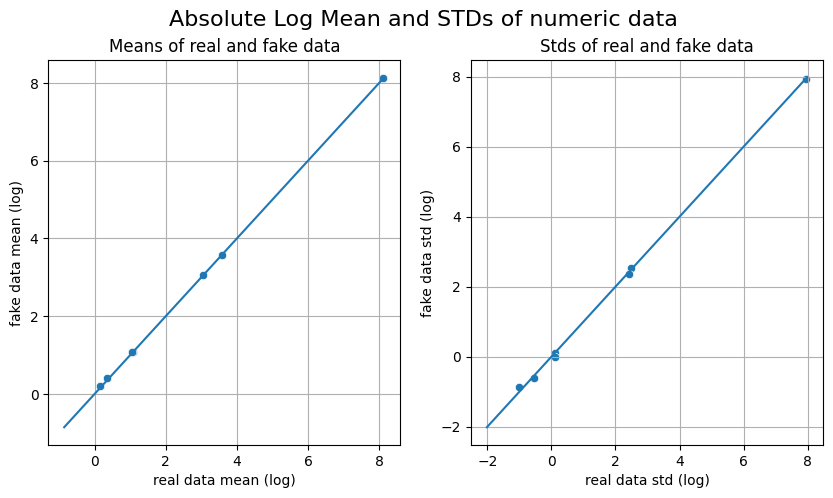

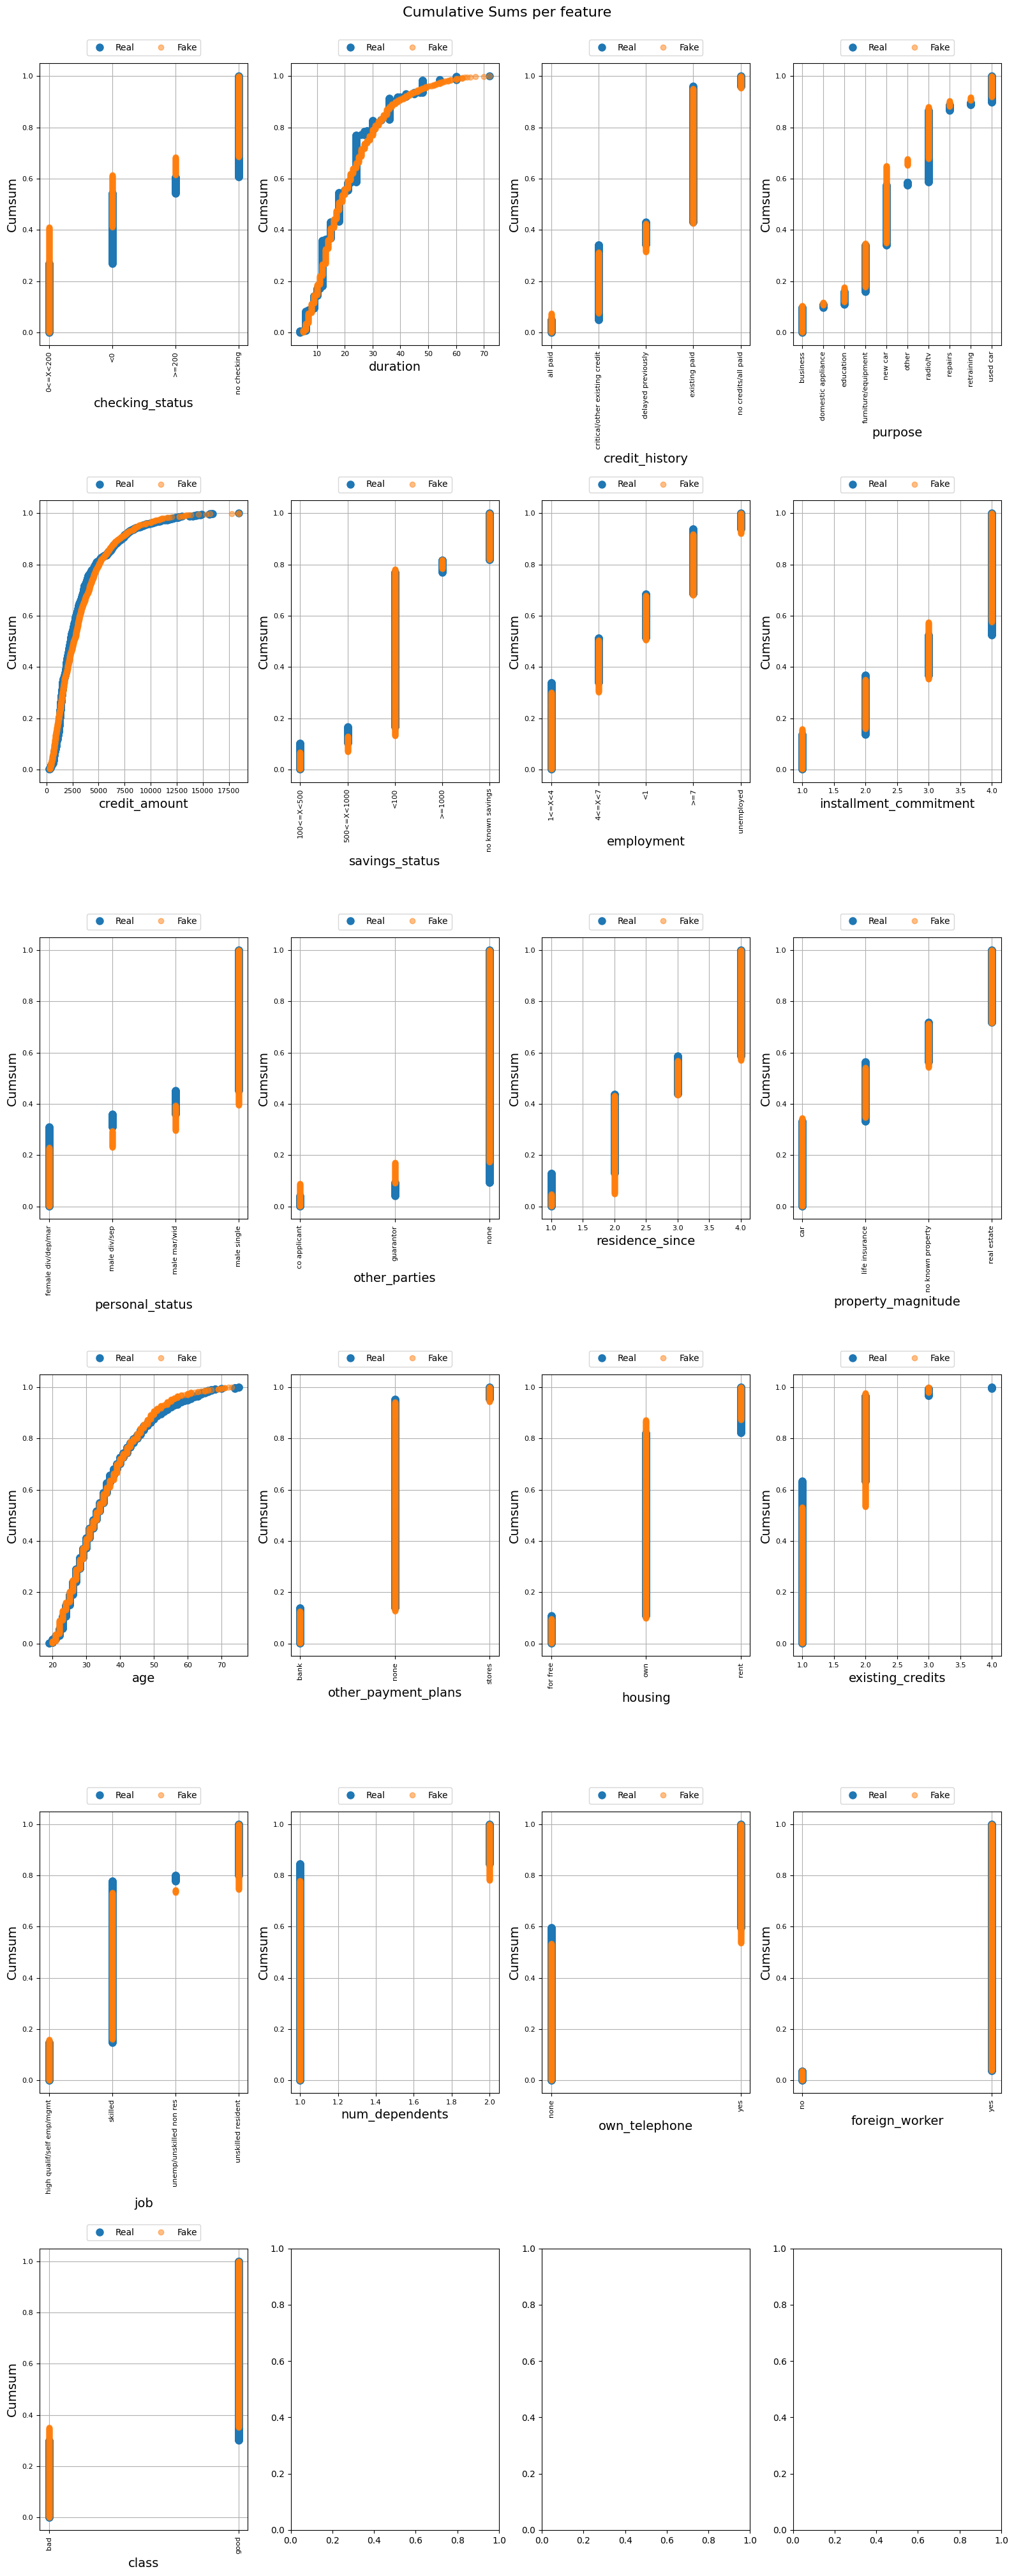

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

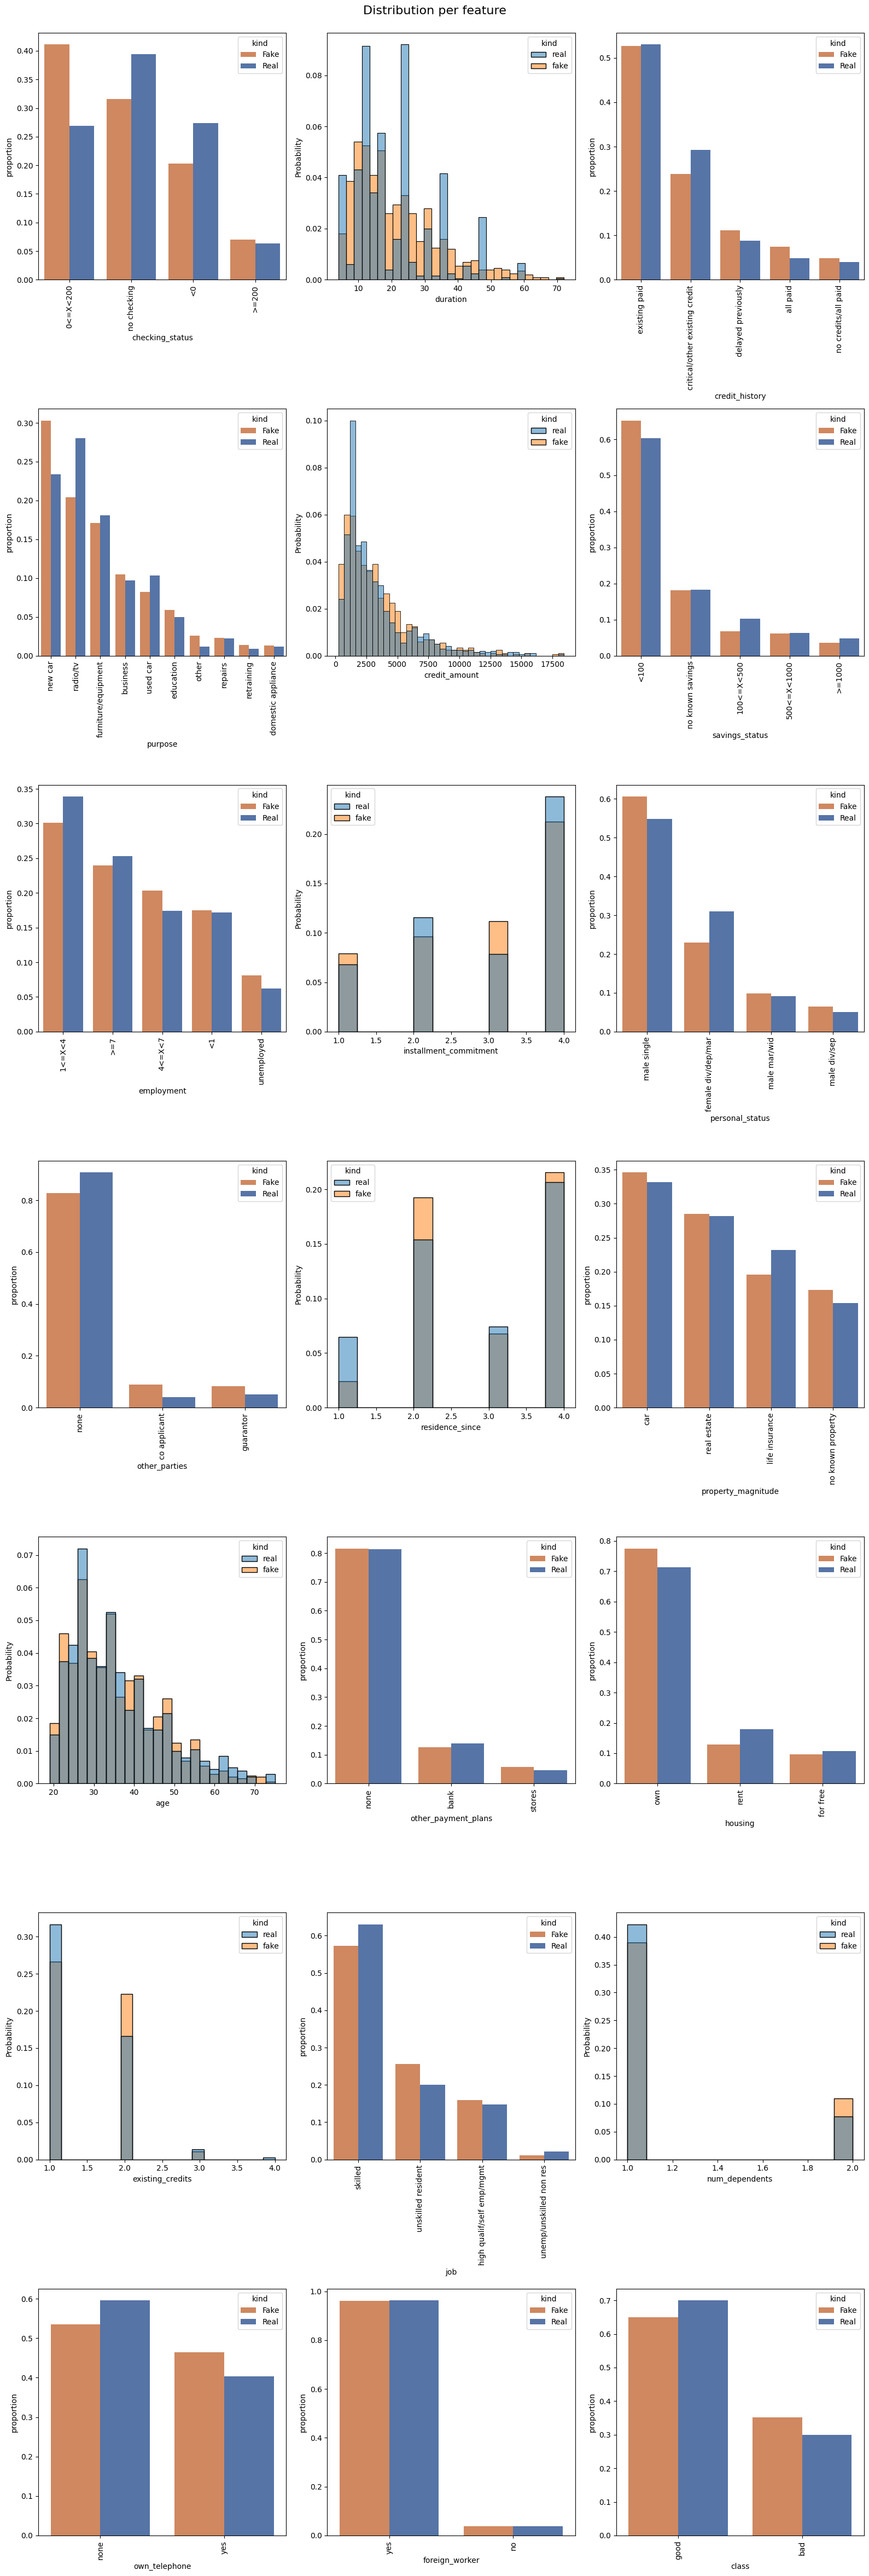

TypeError: Image data of dtype object cannot be converted to float

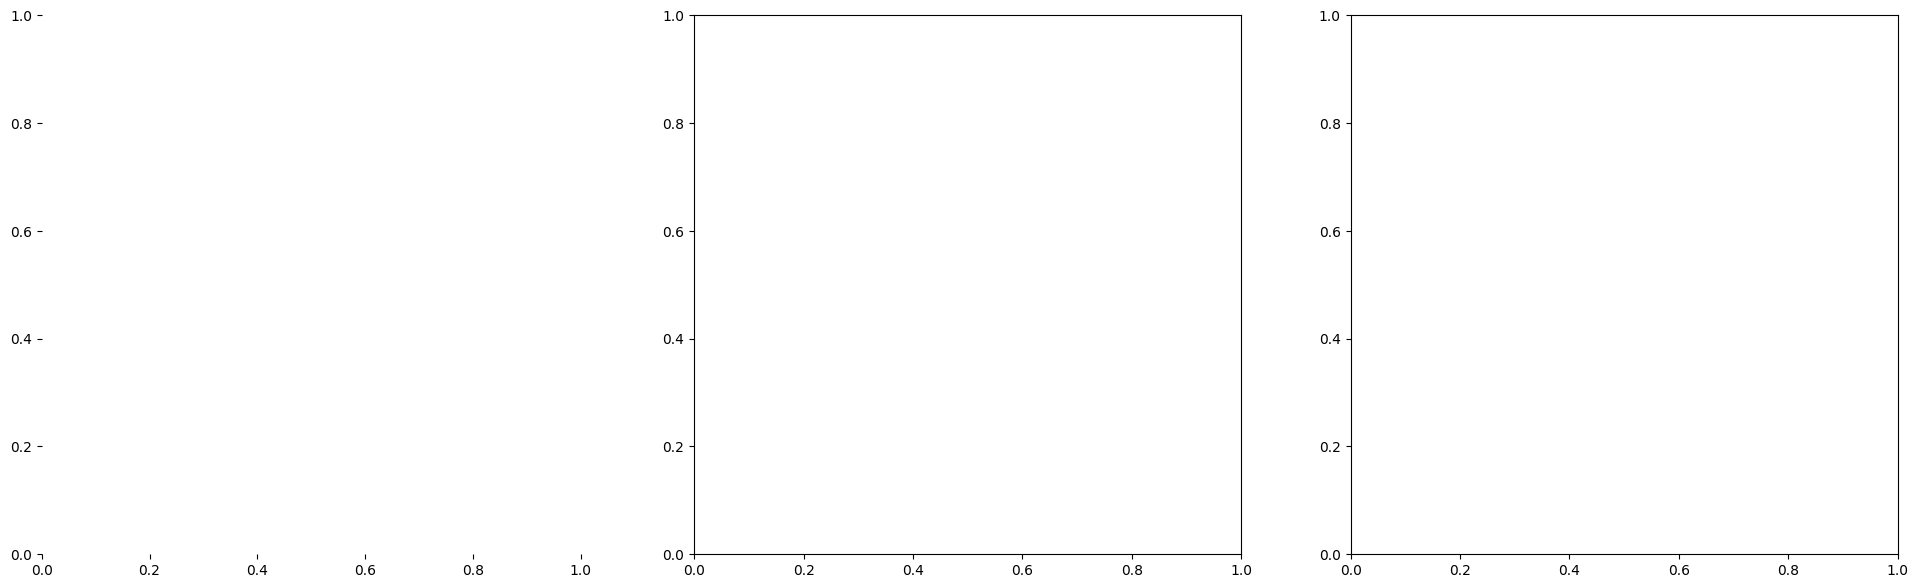

In [4]:
hybrid1= hybrid1.drop(hybrid1.columns[[0]],axis=1)
hybrid2= hybrid2.drop(hybrid2.columns[[0]],axis=1)
cat_cols=['checking_status','credit_history', 'purpose',
        'savings_status', 'employment','personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans',
       'housing', 'job',  'own_telephone',
       'foreign_worker', 'class']
from table_evaluator import TableEvaluator
table_evaluator1 = TableEvaluator(real_data, hybrid1 , cat_cols=cat_cols)
table_evaluator1.visual_evaluation()

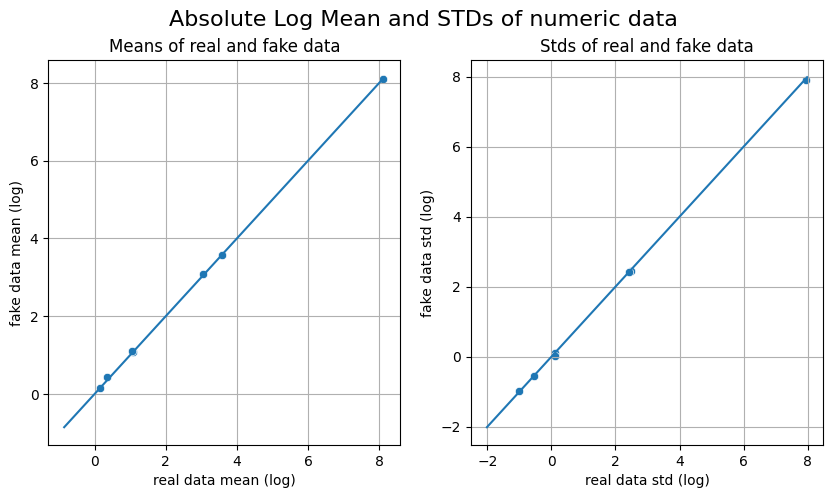

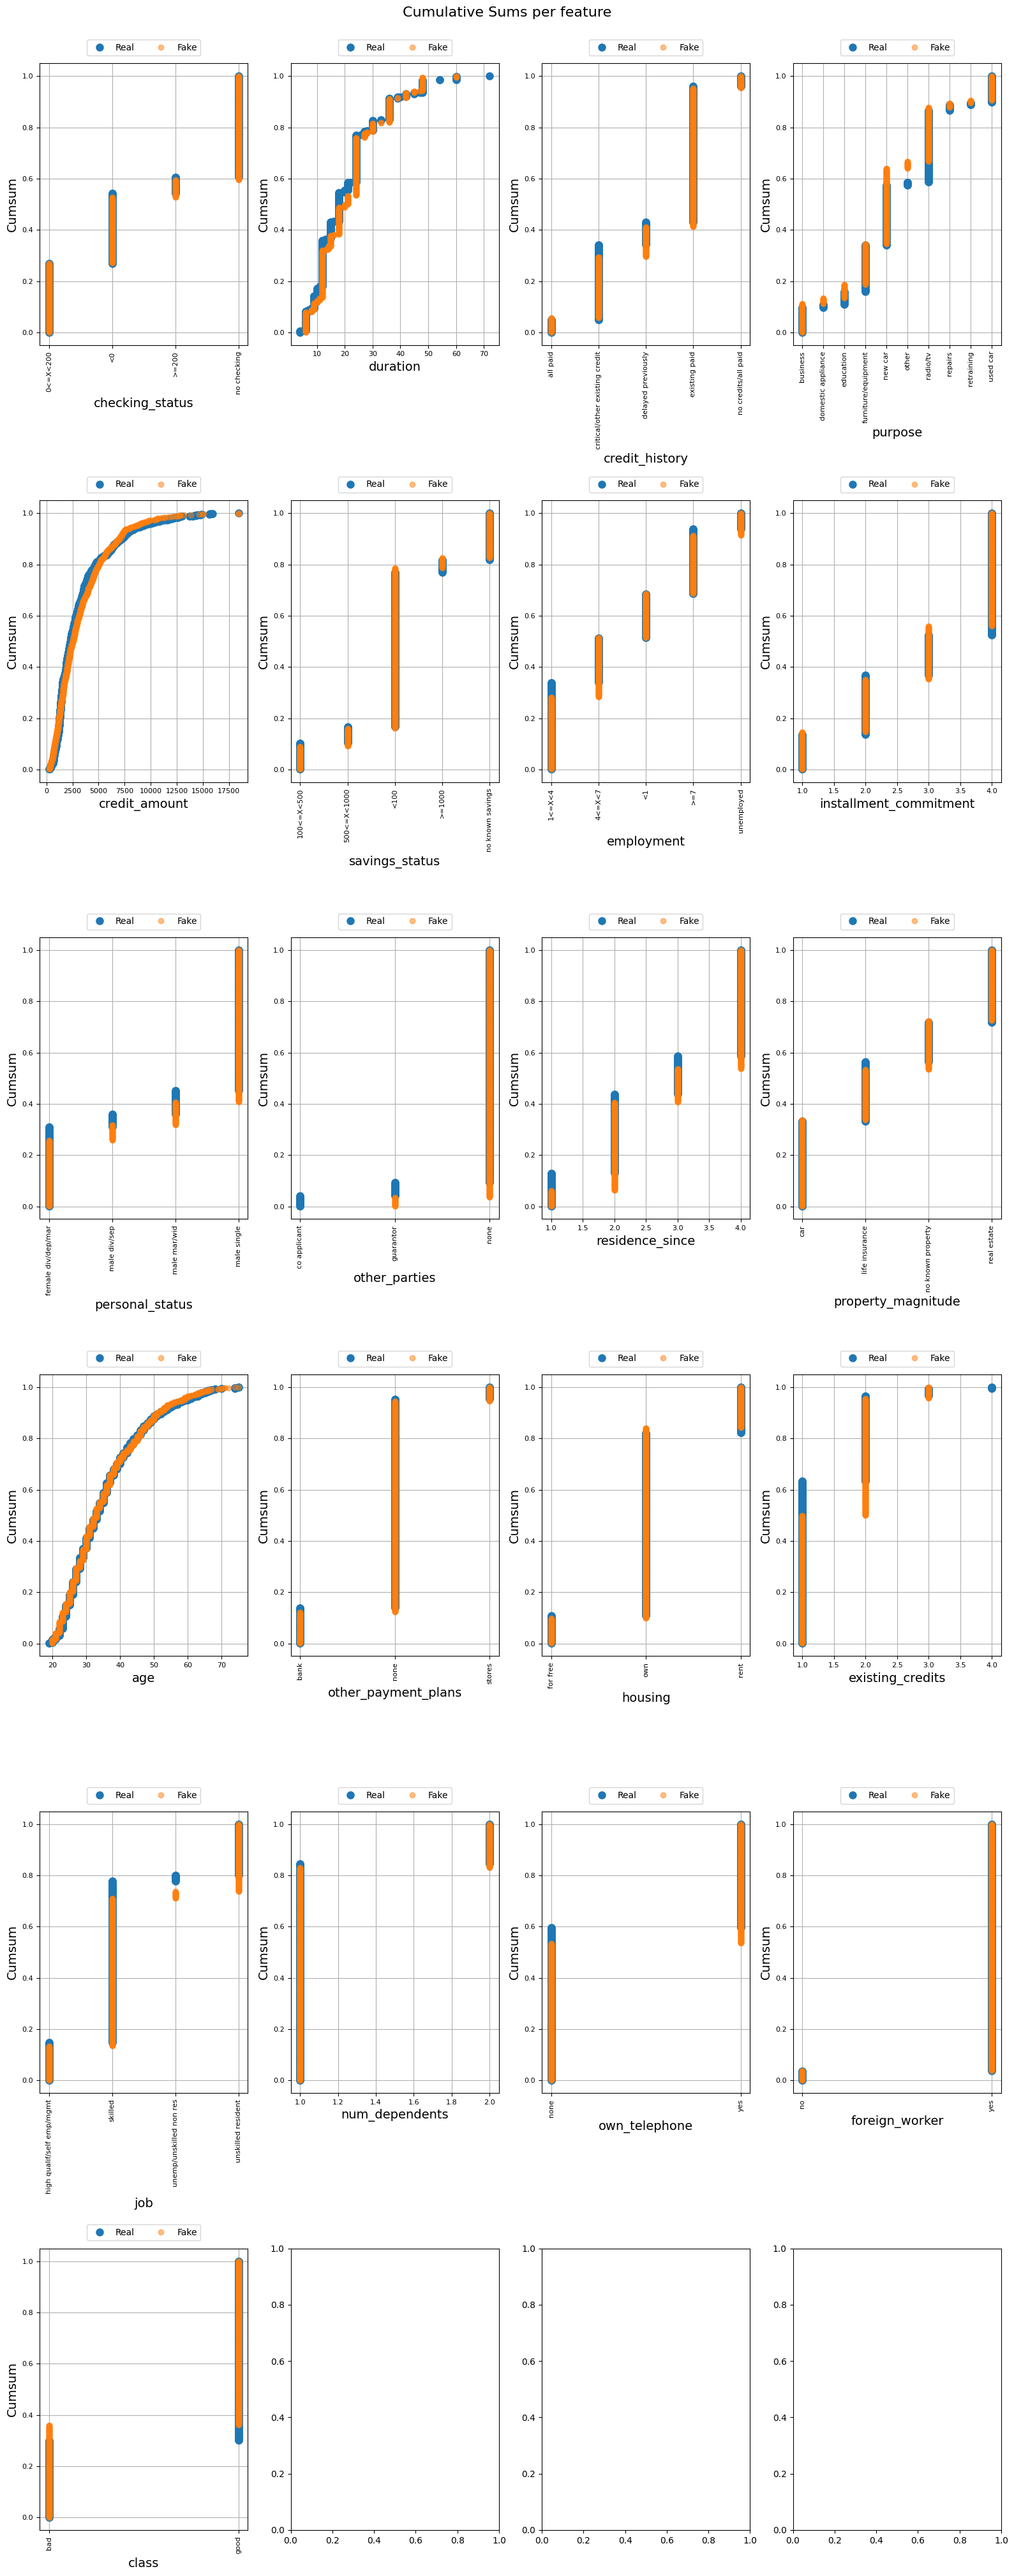

C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plot_df = pd.DataFrame({col: self.real[col].append(self.fake[col]), 'kind': ['real'] * self.n_samples + ['fake'] * self.n_samples})
C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\table_evaluator\table_evaluator.py:156: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

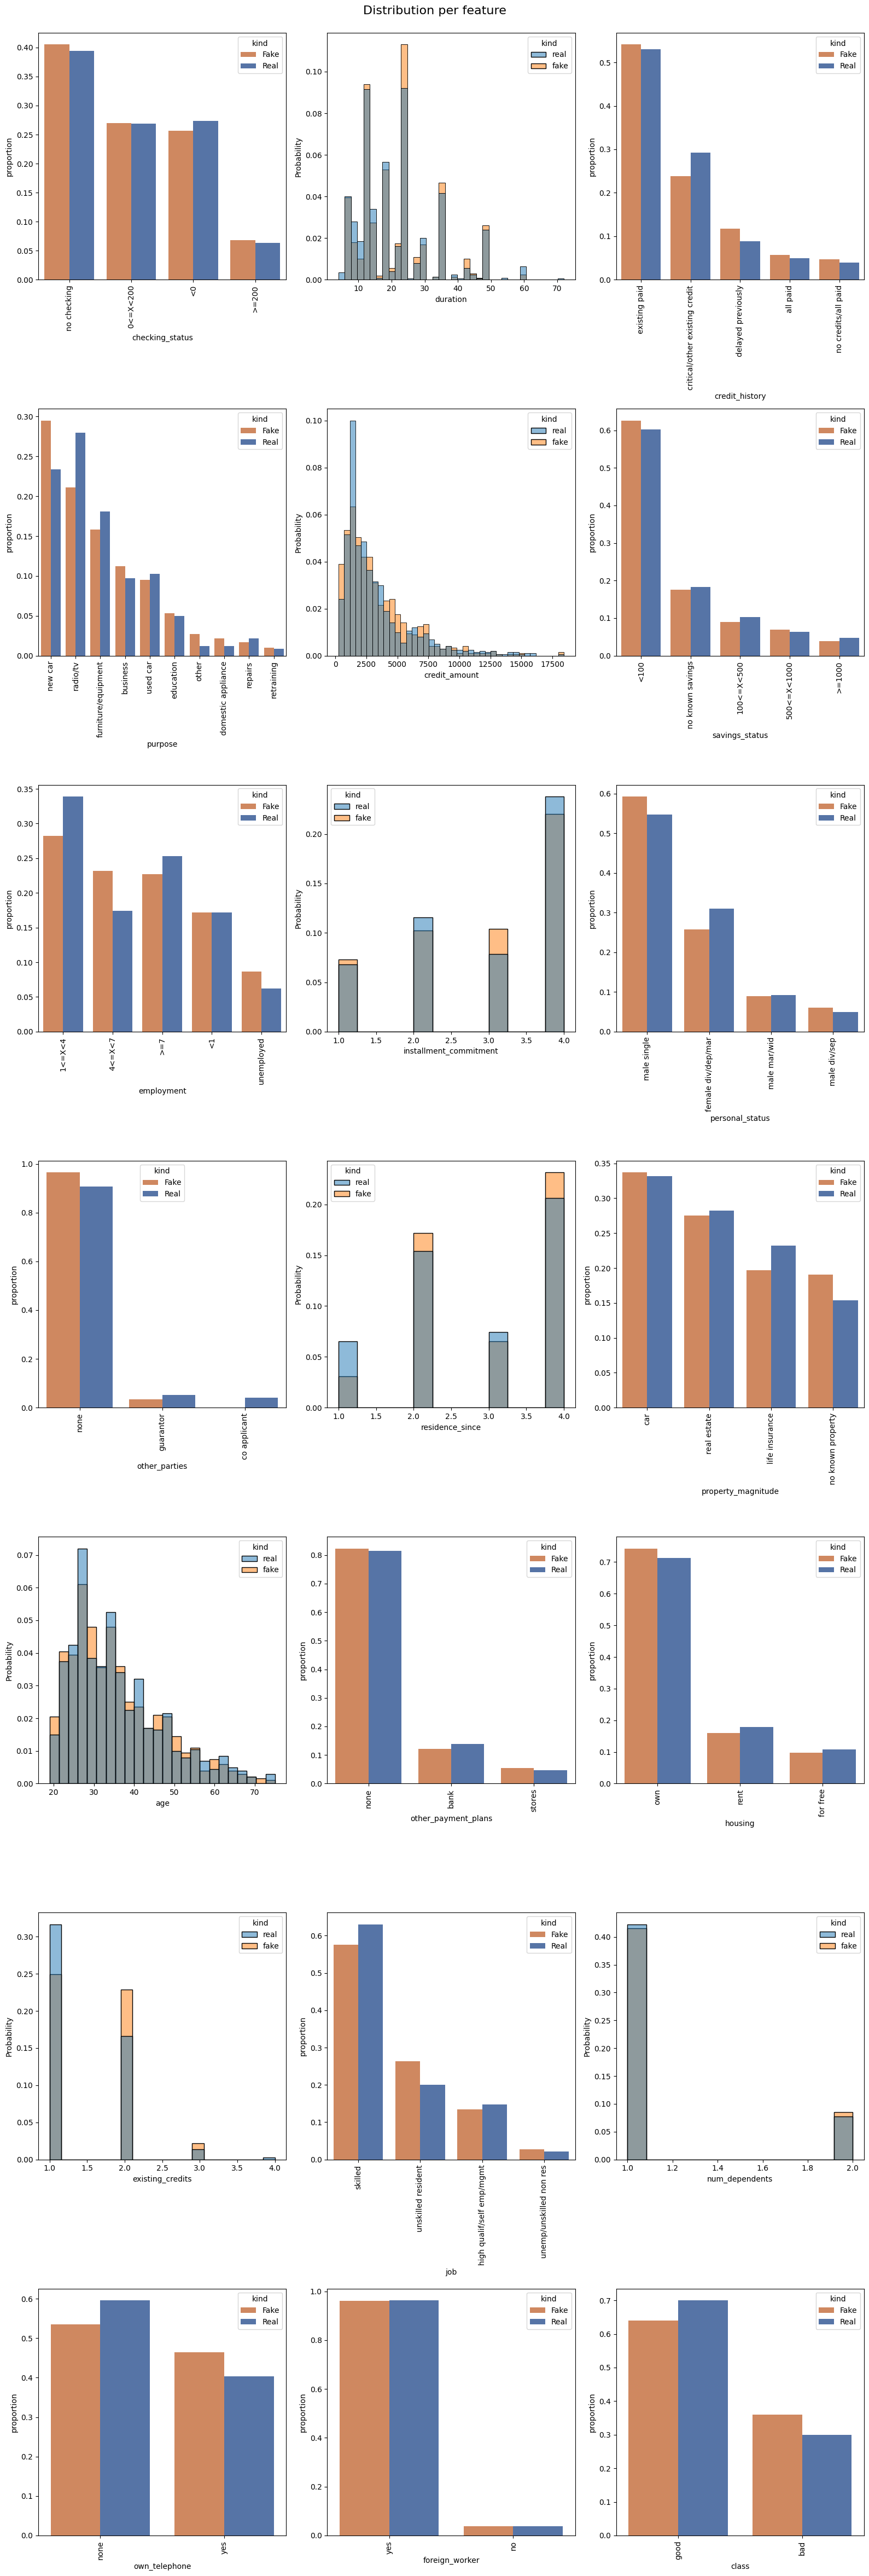

TypeError: Image data of dtype object cannot be converted to float

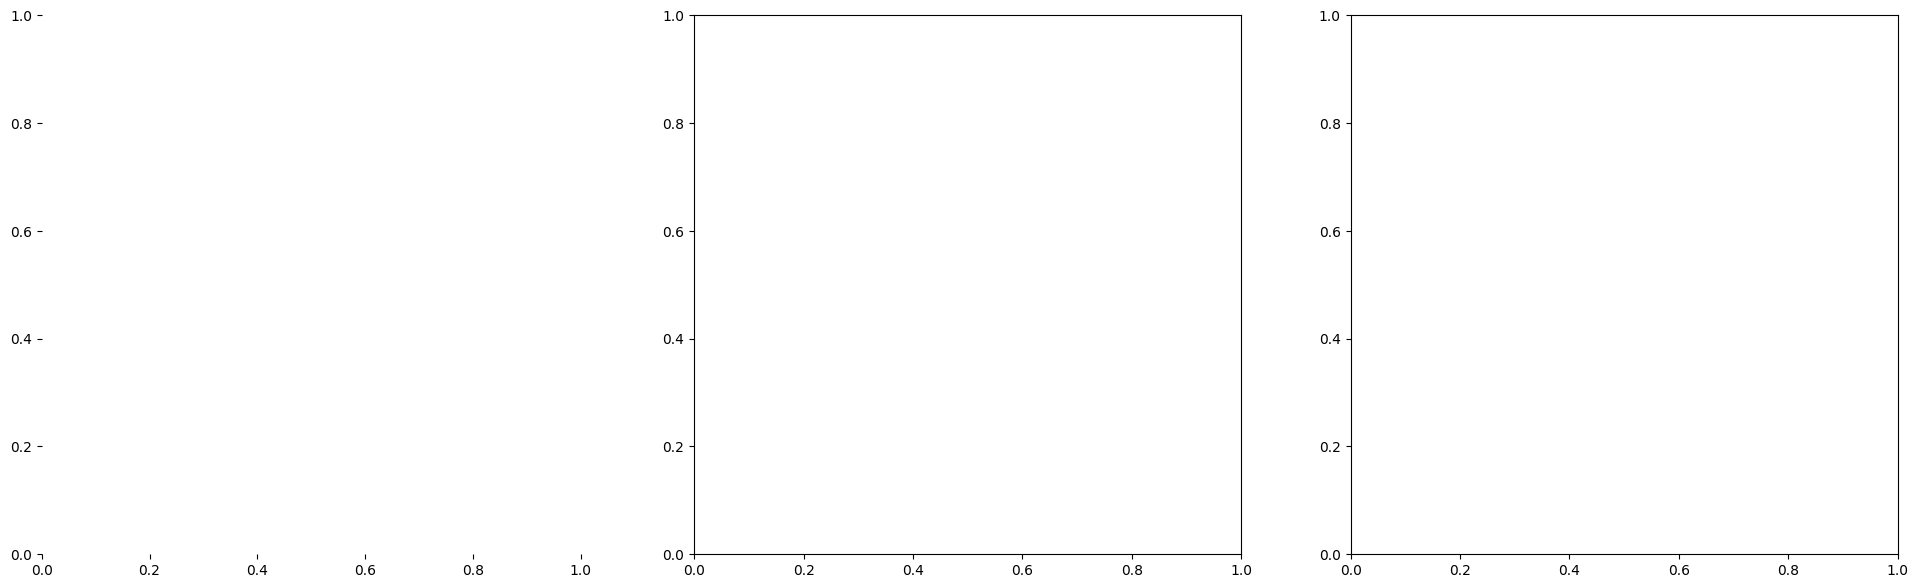

In [5]:
table_evaluator2 = TableEvaluator(real_data, hybrid2 , cat_cols=cat_cols)
table_evaluator2.visual_evaluation()

In [18]:
#testing for UCI credit risk data

import pandas as pd 
import numpy as np
import hybrid

In [19]:
gc= pd.read_csv('uci_gc.csv')
gc.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,0,285981.0,1,2,2,39,0,0,0,...,97715.0,89899.0,85980.0,10138.0,32462.0,8993.0,3968.0,17668.0,9932.0,0
1,1,1,189419.0,2,1,1,27,2,3,1,...,256090.0,178251.0,155121.0,14228.0,8040.0,21782.0,1970.0,2794.0,8469.0,0
2,2,2,135829.0,1,1,1,35,0,-1,-1,...,-13187.0,5019.0,1019.0,8537.0,3409.0,31.0,302.0,2663.0,9111.0,0
3,3,3,135309.0,1,5,1,39,0,-1,-2,...,53638.0,15393.0,35038.0,90.0,215.0,1883.0,595.0,0.0,379.0,0
4,4,4,98488.0,2,2,1,36,-1,0,0,...,43410.0,81111.0,67985.0,659.0,1969.0,194.0,503.0,74.0,29.0,0


In [20]:
ct=pd.read_csv('uci_synthetic_ctgan.csv')
ct.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,0,25175.0,2,2,1,23,-1,2,2,...,16111.0,26982.0,10827.0,595.0,0.0,0.0,2247.0,1017.0,1774.0,0
1,1,1,17480.0,1,1,2,45,-1,-1,-1,...,1451.0,505.0,-435.0,472.0,830.0,0.0,0.0,167.0,302.0,0
2,2,2,279385.0,2,2,2,31,1,-1,2,...,4307.0,16487.0,24699.0,6096.0,1261.0,5963.0,2492.0,3891.0,3643.0,1
3,3,3,483818.0,2,2,1,51,2,0,0,...,251057.0,222788.0,394010.0,9300.0,13917.0,8681.0,7962.0,4781.0,4522.0,1
4,4,4,23392.0,2,2,2,30,1,-2,-2,...,-127.0,1695.0,674.0,0.0,0.0,214.0,296.0,357.0,41.0,0


In [21]:
spop=pd.read_csv('UCI_synthpop.csv')
spop.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0,350000.0,0,1,2,35,1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,260000.0,1,2,1,30,-1,-1,-1,0,...,43546.0,2398.0,5525.0,5588.0,5000.0,39000.0,2456.0,5584.0,5574.0,0
2,2,360000.0,1,3,2,41,-2,-2,-2,-2,...,500.0,0.0,389.0,4107.0,311.0,505.0,0.0,390.0,590.0,0
3,3,120000.0,1,1,2,45,1,-1,-1,-1,...,4383.0,80.0,150.0,550.0,13337.0,4562.0,1.0,150.0,2379.0,0
4,4,50000.0,1,1,2,37,-1,-1,-1,-1,...,303.0,325.0,1390.0,0.0,3421.0,302.0,325.0,2620.0,0.0,0


In [22]:
gc= gc.drop('Unnamed: 0',axis=1)
ct=ct.drop('Unnamed: 0',axis=1)
#spop.rename(columns={'Unnamed: 0':'ID'},inplace=True)

In [23]:
from sdv.metadata import SingleTableMetadata #this is a function that creates metadata, tries to capture the datatypes 
                                              
metadata = SingleTableMetadata.load_from_json(
filepath='mtd.json') # loading the metadata

In [25]:
gc= gc.drop('ID',axis=1)
ct=ct.drop('ID',axis=1)
#spop=spop.drop('ID',axis=1)
spop

KeyError: "['ID'] not found in axis"

In [27]:
real_data=pd.read_csv('UCI_Credit_Card.csv')
real_data= real_data.drop('ID',axis=1)
hyb1=hybrid.hybrid(real_data,gc,ct,metadata)

First dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.05s/it]



Overall Quality Score: 88.54%

Properties:
Column Shapes: 84.95%
Column Pair Trends: 92.13%
Second dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.16s/it]



Overall Quality Score: 93.26%

Properties:
Column Shapes: 91.01%
Column Pair Trends: 95.52%
--------------First dataset report:-------------
                        Column        Metric  Quality Score
0                    LIMIT_BAL  KSComplement       0.926167
1                          AGE  KSComplement       0.982433
2                        PAY_0  KSComplement       0.926533
3                        PAY_2  KSComplement       0.878567
4                        PAY_3  KSComplement       0.878200
5                        PAY_4  KSComplement       0.874467
6                        PAY_5  KSComplement       0.869500
7                        PAY_6  KSComplement       0.879200
8                    BILL_AMT1  KSComplement       0.761100
9                    BILL_AMT2  KSComplement       0.814767
10                   BILL_AMT3  KSComplement       0.777700
11                   BILL_AMT4  KSComplement       0.774867
12                   BILL_AMT5  KSComplement       0.793533
13                

Hybrid quality score


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.39s/it]



Overall Quality Score: 93.63%

Properties:
Column Shapes: 91.75%
Column Pair Trends: 95.51%
Hybrid dataset report:
                        Column        Metric  Quality Score
0                    LIMIT_BAL  KSComplement       0.926167
1                          AGE  KSComplement       0.982433
2                        PAY_0  KSComplement       0.960833
3                        PAY_2  KSComplement       0.977800
4                        PAY_3  KSComplement       0.973667
5                        PAY_4  KSComplement       0.974133
6                        PAY_5  KSComplement       0.971633
7                        PAY_6  KSComplement       0.974333
8                    BILL_AMT1  KSComplement       0.879800
9                    BILL_AMT2  KSComplement       0.894133
10                   BILL_AMT3  KSComplement       0.817633
11                   BILL_AMT4  KSComplement       0.916367
12                   BILL_AMT5  KSComplement       0.920733
13                   BILL_AMT6  KSComplement

In [28]:
hyb2=hybrid.hybrid(real_data,hyb1,spop,metadata)

First dataset quality score:


Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:05<00:00,  1.28s/it]



Overall Quality Score: 93.63%

Properties:
Column Shapes: 91.75%
Column Pair Trends: 95.51%
Second dataset quality score:


Creating report:   0%|                                                                           | 0/4 [00:00<?, ?it/s]


ValueError: `real_data` and `synthetic_data` must have the same columns

In [17]:
from sdv.evaluation.single_table import evaluate_quality
quality_report = evaluate_quality(
    real_data,
    spop,
    metadata
)

Creating report:  25%|████████████████▊                                                  | 1/4 [00:00<00:02,  1.01it/s]C:\Users\arnab\AppData\Local\Programs\Python\Python310\lib\site-packages\sdmetrics\utils.py:67: UserWarning: Unexpected value 0 in synthetic data.
  warnings.warn(f'Unexpected value {value} in synthetic data.')
Creating report: 100%|███████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.23s/it]



Overall Quality Score: 92.54%

Properties:
Column Shapes: 92.88%
Column Pair Trends: 92.19%
